In [1]:
!unzip Dogs.zip -d dogs

Archive:  Dogs.zip
   creating: dogs/Dogs/
  inflating: dogs/__MACOSX/._Dogs    
   creating: dogs/Dogs/Yorkshire_Test/
  inflating: dogs/__MACOSX/Dogs/._Yorkshire_Test  
  inflating: dogs/Dogs/.DS_Store     
  inflating: dogs/__MACOSX/Dogs/._.DS_Store  
   creating: dogs/Dogs/Labrador_Test/
  inflating: dogs/__MACOSX/Dogs/._Labrador_Test  
   creating: dogs/Dogs/Labrador/
  inflating: dogs/__MACOSX/Dogs/._Labrador  
   creating: dogs/Dogs/ShihTzu_Test/
  inflating: dogs/__MACOSX/Dogs/._ShihTzu_Test  
   creating: dogs/Dogs/ShihTzu/
  inflating: dogs/__MACOSX/Dogs/._ShihTzu  
   creating: dogs/Dogs/Yorkshire/
  inflating: dogs/__MACOSX/Dogs/._Yorkshire  
   creating: dogs/Dogs/Doberman/
  inflating: dogs/__MACOSX/Dogs/._Doberman  
   creating: dogs/Dogs/Doberman_Test/
  inflating: dogs/__MACOSX/Dogs/._Doberman_Test  
  inflating: dogs/Dogs/Yorkshire_Test/n02094433_3848.jpg  
  inflating: dogs/__MACOSX/Dogs/Yorkshire_Test/._n02094433_3848.jpg  
  inflating: dogs/Dogs/Yorkshire_Test/n020

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import urllib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [7]:
image = cv2.imread('/content/dogs/Dogs/Doberman/n02107142_10009.jpg') #load one image
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

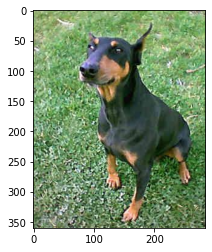

In [8]:
plt.imshow(img)

In [17]:
img.shape

(360, 285, 3)

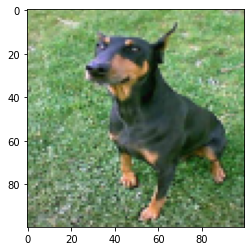

In [20]:
dim = (100,100) #resize
reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(reduccion)

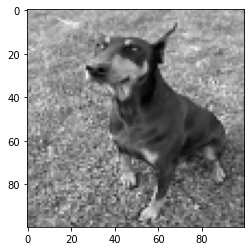

In [21]:
grises = cv2.cvtColor(reduccion, cv2.COLOR_RGB2GRAY)
plt.imshow(grises, cmap="binary_r")
plt.show() #change to gray

In [22]:
grises.shape

(100, 100)

In [11]:
import os

In [13]:
os.getcwd()

'/content'

In [23]:
os.chdir("/content/dogs/Dogs/Doberman")

In [24]:
os.getcwd()

'/content/dogs/Dogs/Doberman'

In [35]:
os.listdir(os.chdir("/content/dogs/Dogs/Doberman"))

['n02107142_8568.jpg',
 'n02107142_5196.jpg',
 'n02107142_3033.jpg',
 'n02107142_5663.jpg',
 'n02107142_4632.jpg',
 'n02107142_8834.jpg',
 'n02107142_1193.jpg',
 'n02107142_7237.jpg',
 'n02107142_4017.jpg',
 'n02107142_248.jpg',
 'n02107142_3073.jpg',
 'n02107142_3094.jpg',
 'n02107142_814.jpg',
 'n02107142_1306.jpg',
 'n02107142_9772.jpg',
 'n02107142_10009.jpg',
 'n02107142_21.jpg',
 'n02107142_4148.jpg',
 'n02107142_7703.jpg',
 'n02107142_9379.jpg',
 'n02107142_607.jpg',
 'n02107142_3236.jpg',
 'n02107142_7841.jpg',
 'n02107142_5144.jpg',
 'n02107142_2418.jpg',
 'n02107142_9282.jpg',
 'n02107142_5166.jpg',
 'n02107142_208.jpg',
 'n02107142_3621.jpg',
 'n02107142_2153.jpg',
 'n02107142_5284.jpg',
 'n02107142_8399.jpg',
 'n02107142_6859.jpg',
 'n02107142_30.jpg',
 'n02107142_1886.jpg',
 'n02107142_790.jpg',
 'n02107142_4653.jpg',
 'n02107142_5181.jpg',
 'n02107142_6383.jpg',
 'n02107142_2779.jpg',
 'n02107142_473.jpg',
 'n02107142_3741.jpg',
 'n02107142_7300.jpg',
 'n02107142_9621.jpg

In [43]:
lista_train = [] #collect all images from different folders

lista_dobermans = os.listdir(os.chdir("/content/dogs/Dogs/Doberman"))
lista_imagenes = []
for i in lista_dobermans:
  lista_train.append(cv2.imread(i))

os.chdir("/content/dogs/Dogs/Labrador")
lista_labrador = os.listdir(os.chdir("/content/dogs/Dogs/Labrador"))
for k in lista_labrador:
  lista_train.append(cv2.imread(k))

os.chdir("/content/dogs/Dogs/ShihTzu")
lista_shihtzu = os.listdir(os.chdir("/content/dogs/Dogs/ShihTzu"))
for k in lista_shihtzu:
  lista_train.append(cv2.imread(k))

os.chdir("/content/dogs/Dogs/Yorkshire")
lista_yorkshire = os.listdir(os.chdir("/content/dogs/Dogs/Yorkshire"))
for k in lista_yorkshire :
  lista_train.append(cv2.imread(k))


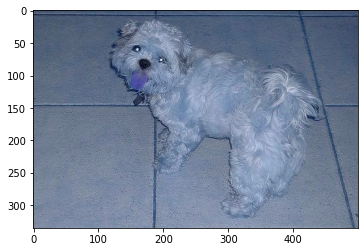

In [45]:
plt.imshow(lista_train[250])

In [47]:
lista_test = []

lista_dobermans_test = os.listdir(os.chdir("/content/dogs/Dogs/Doberman_Test"))
lista_imagenes = []
for i in lista_dobermans_test:
  lista_test.append(cv2.imread(i))

os.chdir("/content/dogs/Dogs/Labrador_Test")
lista_labrador_test = os.listdir(os.chdir("/content/dogs/Dogs/Labrador_Test"))
for k in lista_labrador_test:
  lista_test.append(cv2.imread(k))

os.chdir("/content/dogs/Dogs/ShihTzu_Test")
lista_shihtzu_test = os.listdir(os.chdir("/content/dogs/Dogs/ShihTzu_Test"))
for k in lista_shihtzu_test:
  lista_test.append(cv2.imread(k))

os.chdir("/content/dogs/Dogs/Yorkshire_Test")
lista_yorkshire_test = os.listdir(os.chdir("/content/dogs/Dogs/Yorkshire_Test"))
for k in lista_yorkshire_test :
  lista_test.append(cv2.imread(k))

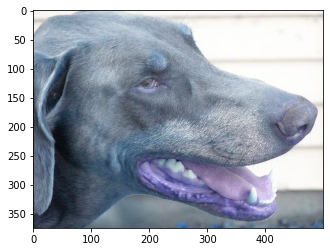

In [48]:
plt.imshow(lista_test[10])

In [49]:
len(lista_dobermans_test)

30

In [50]:
len(lista_labrador_test)

30

In [66]:
len(lista_dobermans)

100

In [124]:
test_labels = np.array([0]*30 + [1]*30 + [2]*30 + [3]*30) #create labels to see which type of dog is 

In [125]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [126]:
train_labels = np.array([0]*100 + [1]*100 + [2]*100 + [3]*100)
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

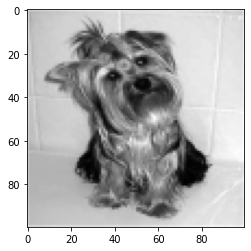

In [79]:
lista_train2 = [] #change to gray each image , resize each image 
for i in lista_train:
  image = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
  plt.imshow(image, cmap="binary_r")
  dim = (100,100)
  reduccion = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  grises = cv2.cvtColor(reduccion, cv2.COLOR_RGB2GRAY)
  plt.imshow(grises, cmap="binary_r")
  lista_train2.append(grises)

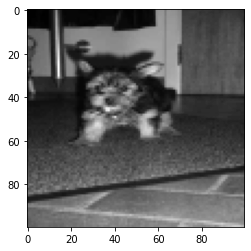

In [82]:
lista_test2 = []
for i in lista_test:
  image = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
  plt.imshow(image, cmap="binary_r")
  dim = (100,100)
  reduccion = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  grises = cv2.cvtColor(reduccion, cv2.COLOR_RGB2GRAY)
  plt.imshow(grises, cmap="binary_r")
  lista_test2.append(grises)

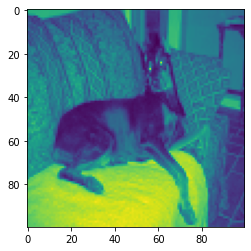

In [81]:
plt.imshow(lista_train2[1])

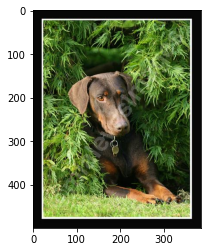

In [73]:
image = cv2.cvtColor(lista_train[0],cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="binary_r")

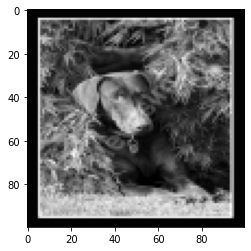

In [77]:
reduccion = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
grises = cv2.cvtColor(reduccion, cv2.COLOR_RGB2GRAY)
plt.imshow(grises, cmap="binary_r")

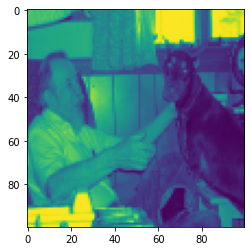

In [83]:
plt.imshow(lista_test2[1])

In [ ]:
#lista_train2, train_labels, lista_test2, test_labels

In [85]:
lista_train2[0].shape

(100, 100)

In [ ]:
#train_images = train_images / 255.0

#test_images = test_images / 255.0

In [99]:
lista_train3 = [] #normalize images 
for i in lista_train2:
  i = i.astype('float32')
  i = i/255
  lista_train3.append(i)

lista_test3 = []
for i in lista_test2:
  i = i.astype('float32')
  i = i/255
  lista_test3.append(i)

In [101]:
lista_test3[0]

array([[0.47843137, 0.63529414, 0.62352943, ..., 0.8       , 0.76862746,
        0.90588236],
       [0.56078434, 0.7058824 , 0.72156864, ..., 0.8235294 , 0.7254902 ,
        0.87058824],
       [0.52156866, 0.6745098 , 0.64705884, ..., 0.85882354, 0.7176471 ,
        0.8509804 ],
       ...,
       [0.61960787, 0.5882353 , 0.6431373 , ..., 0.64705884, 0.54901963,
        0.827451  ],
       [0.69411767, 0.654902  , 0.7176471 , ..., 0.5764706 , 0.6       ,
        0.8235294 ],
       [0.6784314 , 0.65882355, 0.70980394, ..., 0.6745098 , 0.59607846,
        0.7764706 ]], dtype=float32)

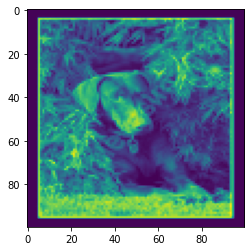

In [96]:
plt.imshow(lista_train2[0])

In [127]:
y_train = to_categorical(train_labels, num_classes=4) #convert categories to array with 0 and 1s
y_test = to_categorical(test_labels, num_classes=4)

In [128]:
y_train.shape

(400, 4)

In [106]:
type(lista_train3)

list

In [108]:
np.array(lista_train3).shape

(400, 100, 100)

In [110]:
np.array(lista_test3).shape

(120, 100, 100)

In [115]:
x_train = np.array(lista_train3).reshape(400,10000) #convert inputs to arrays and reshape to have 1 dimension (10000 = 100*100)
x_test = np.array(lista_test3).reshape(120,10000)

In [129]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(10000,)))  
model.add(Dense(4, activation='softmax')) #output

In [130]:
model.compile(loss="mean_squared_error", #train 
              optimizer="sgd",
              metrics = ['accuracy'])

In [131]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 5ms/step - loss: 0.2145 - accuracy: 0.2645
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.2985
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1919 - accuracy: 0.2798
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1891 - accuracy: 0.3017
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1880 - accuracy: 0.3080
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.3263
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 0.3240
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.3292
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1841 - accuracy: 0.3396
Epoch 10/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.3141
Epoch 11/20
13/13 [

In [132]:
predictions = model.predict(x_test)

In [134]:
Y_true = np.argmax(predictions, axis = 1)

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_true,test_labels)

0.3416666666666667

In [136]:
from sklearn.metrics import f1_score
f1_score(Y_true,test_labels, average= 'macro')

0.31063832808018854

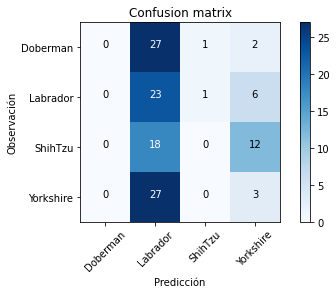

In [151]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = ['Doberman','Labrador','ShihTzu','Yorkshire'])

In [141]:
#2

In [146]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(10000,)))
model.add(Dense(128, activation='sigmoid', input_shape=(10000,))) 
model.add(Dense(4, activation='softmax')) 

model.compile(loss="categorical_crossentropy",  
              optimizer="sgd",
              metrics = ['accuracy'])


In [147]:
model.fit(x_train, y_train, epochs=40)

Epoch 1/40
13/13 [==============================] - 0s 3ms/step - loss: 1.6892 - accuracy: 0.2173
Epoch 2/40
13/13 [==============================] - 0s 4ms/step - loss: 1.4193 - accuracy: 0.2736
Epoch 3/40
13/13 [==============================] - 0s 4ms/step - loss: 1.3870 - accuracy: 0.2690
Epoch 4/40
13/13 [==============================] - 0s 4ms/step - loss: 1.3855 - accuracy: 0.2727
Epoch 5/40
13/13 [==============================] - 0s 4ms/step - loss: 1.3813 - accuracy: 0.2902
Epoch 6/40
13/13 [==============================] - 0s 4ms/step - loss: 1.3805 - accuracy: 0.2806
Epoch 7/40
13/13 [==============================] - 0s 3ms/step - loss: 1.3782 - accuracy: 0.2802
Epoch 8/40
13/13 [==============================] - 0s 4ms/step - loss: 1.3798 - accuracy: 0.2777
Epoch 9/40
13/13 [==============================] - 0s 3ms/step - loss: 1.3814 - accuracy: 0.3104
Epoch 10/40
13/13 [==============================] - 0s 4ms/step - loss: 1.3793 - accuracy: 0.2800
Epoch 11/40
13/13 [

In [148]:
#3



In [149]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(10000,))) 
model.add(Dense(4, activation='softmax')) 


model.compile(loss="categorical_crossentropy", 
              optimizer="adam",
              metrics = ['accuracy'])


In [150]:
model.fit(x_train, y_train, epochs=40)

Epoch 1/40
13/13 [==============================] - 0s 3ms/step - loss: 1.5899 - accuracy: 0.2100
Epoch 2/40
13/13 [==============================] - 0s 4ms/step - loss: 1.5234 - accuracy: 0.2297
Epoch 3/40
13/13 [==============================] - 0s 3ms/step - loss: 1.5012 - accuracy: 0.2536
Epoch 4/40
13/13 [==============================] - 0s 3ms/step - loss: 1.4878 - accuracy: 0.2392
Epoch 5/40
13/13 [==============================] - 0s 3ms/step - loss: 1.4805 - accuracy: 0.2689
Epoch 6/40
13/13 [==============================] - 0s 3ms/step - loss: 1.5055 - accuracy: 0.2156
Epoch 7/40
13/13 [==============================] - 0s 3ms/step - loss: 1.4639 - accuracy: 0.2349
Epoch 8/40
13/13 [==============================] - 0s 3ms/step - loss: 1.4805 - accuracy: 0.2308
Epoch 9/40
13/13 [==============================] - 0s 3ms/step - loss: 1.4544 - accuracy: 0.2706
Epoch 10/40
13/13 [==============================] - 0s 3ms/step - loss: 1.4199 - accuracy: 0.2408
Epoch 11/40
13/13 [

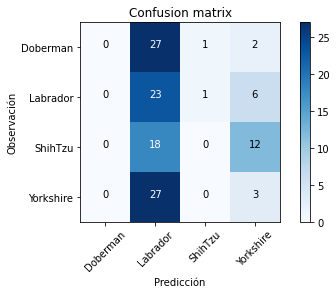

In [152]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = ['Doberman','Labrador','ShihTzu','Yorkshire'])

In [ ]:
#since we have very few images and use a very simple network the results are not optimal 